In [1]:
import sys  
sys.path.insert(0, '../')
from tools.training import make_training, test_on_dataset
from imagenet_models.resnet import resnet18

import numpy as np
import torch.nn as nn
import torch

In [2]:
variation = "original"

In [3]:
net = resnet18(pretrained=True)
temp_net = resnet18(pretrained=False)

In [4]:
net.fc = nn.Linear(512, 9)
temp_net.fc = nn.Linear(512, 9)

In [5]:
net.load_state_dict(torch.load("../models/ResNet_base.pt"))

<All keys matched successfully>

In [6]:
n_epoch_first_train = 0
n_cycle = 30
n_epoch_cycle = 5

using cuda



Finished Training
Final original acc :  100.0
Final mixed_same acc :  90.12345679012346
Final mixed_rand acc :  77.72839506172839

Accuracy Graph with  5  epoch per cycle


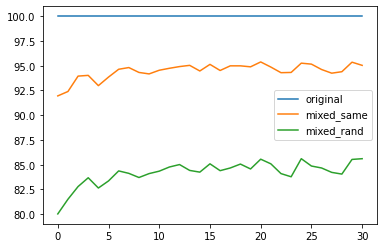

In [7]:
original_acc, mixed_same_acc, mixed_rand_acc = make_training(net,
                                                             temp_net,
                                                             n_epoch_first_train = n_epoch_first_train,
                                                             n_cycle = n_cycle,
                                                             n_epoch_cycle = n_epoch_cycle,
                                                             batch_size = 16,
                                                             workers = 0,
                                                             criterion = nn.CrossEntropyLoss(),
                                                             test_acc_period = 5,
                                                             _print = False,
                                                             initial_lr= 1e-4*np.power(0.9,10))

In [8]:
np.save("../curves/original_acc_" + str(n_epoch_cycle) + ".npy", np.array(original_acc))
np.save("../curves/mixed_same_acc_" + str(n_epoch_cycle) + ".npy", np.array(mixed_same_acc))
np.save("../curves/mixed_rand_acc_" + str(n_epoch_cycle) + ".npy", np.array(mixed_rand_acc))

In [9]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  100.0
Accuracy on  mixed_same  :  90.12345679012346
Accuracy on  mixed_next  :  76.09876543209876
Accuracy on  mixed_rand  :  77.72839506172839
Accuracy on  no_fg  :  51.135802469135804
Accuracy on  only_bg_b  :  28.641975308641975
Accuracy on  only_bg_t  :  34.93827160493827
Accuracy on  only_fg  :  89.06172839506173


In [10]:
for variation in ["original","mixed_same", "mixed_next", "mixed_rand", "no_fg", "only_bg_b", "only_bg_t", "only_fg"] :
    acc = test_on_dataset(variation = variation, net=temp_net)
    print("Accuracy on ", variation, " : ", acc)

Accuracy on  original  :  100.0
Accuracy on  mixed_same  :  95.03703703703704
Accuracy on  mixed_next  :  83.11111111111111
Accuracy on  mixed_rand  :  85.60493827160494
Accuracy on  no_fg  :  65.03703703703704
Accuracy on  only_bg_b  :  34.79012345679013
Accuracy on  only_bg_t  :  37.80246913580247
Accuracy on  only_fg  :  95.95061728395062
